In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Function to load data from a csv file
def load_data(file_path):
    dataframe = pd.read_csv(file_path)
    return dataframe

dataframe = load_data("..\data\data_1_processed.csv")
dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.825529,-1.288402,1.686859,-0.392638,-0.421885,-0.352868,-0.577235,0.711761,-1.283657,1.833517,-0.316266,6
1,1.266735,0.420843,1.216613,-0.311238,2.117818,-0.985683,-0.815265,1.462468,-0.905031,-0.199043,-1.830572,3
2,0.852337,2.498746,0.262645,-0.171289,-0.189064,1.891910,3.237488,0.659792,-0.389634,-1.043350,-0.963382,5
3,-0.550590,-0.968730,0.156792,-0.283459,-0.390565,1.064297,0.334587,-0.319753,0.586586,-0.459408,-0.499907,4
4,0.790976,-1.222962,1.025617,-0.782075,-0.632879,-0.675859,-0.668788,0.159672,-0.627308,1.001280,-0.064642,7
...,...,...,...,...,...,...,...,...,...,...,...,...
2893,0.419009,1.333057,-1.172431,-0.656256,-0.201118,-1.126712,-0.973966,0.611698,-0.120560,-0.674363,-0.600493,4
2894,-0.178100,-0.787162,0.160916,-0.466421,-0.273726,1.599113,1.162279,0.228450,0.504389,-0.280100,-1.333163,5
2895,-0.521580,-1.009936,0.313510,-0.097506,-0.400719,-0.645665,-0.607752,-1.055184,0.312813,-0.338812,1.347748,6
2896,-0.514573,1.774322,-0.898943,2.086012,0.131910,-1.212790,-0.968191,0.766275,0.423236,-0.747397,-0.381266,3


In [43]:
target = "quality"
X = dataframe.drop([target], axis=1)
Y = dataframe[target]

In [44]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000
mean,0.051706,0.244186,0.064830,0.030817,-0.029838,-0.259281,-0.299493,-0.048139,0.030260,-0.001016,0.166607
std,0.960022,1.325707,1.052680,0.882694,0.879177,0.870108,0.851393,0.978170,0.961479,0.936742,1.090338
min,-2.124483,-2.290883,-1.365027,-1.204252,-1.585988,-1.426458,-1.218108,-3.461348,-3.646432,-1.924024,-1.887834
25%,-0.630342,-0.832180,-1.016236,-0.434877,-0.382993,-0.938462,-0.895205,-0.717894,-0.622137,-0.602387,-0.778491
50%,-0.120854,0.048238,0.080706,-0.259029,-0.210229,-0.522314,-0.547476,-0.060626,0.006523,-0.202197,0.012596
75%,0.623351,0.977094,0.929842,0.092619,0.022591,0.135127,0.020328,0.555854,0.568248,0.435589,0.977967
max,4.344377,5.840349,3.721449,9.568078,11.092158,5.112679,7.418423,3.616827,4.463634,7.880809,4.121103


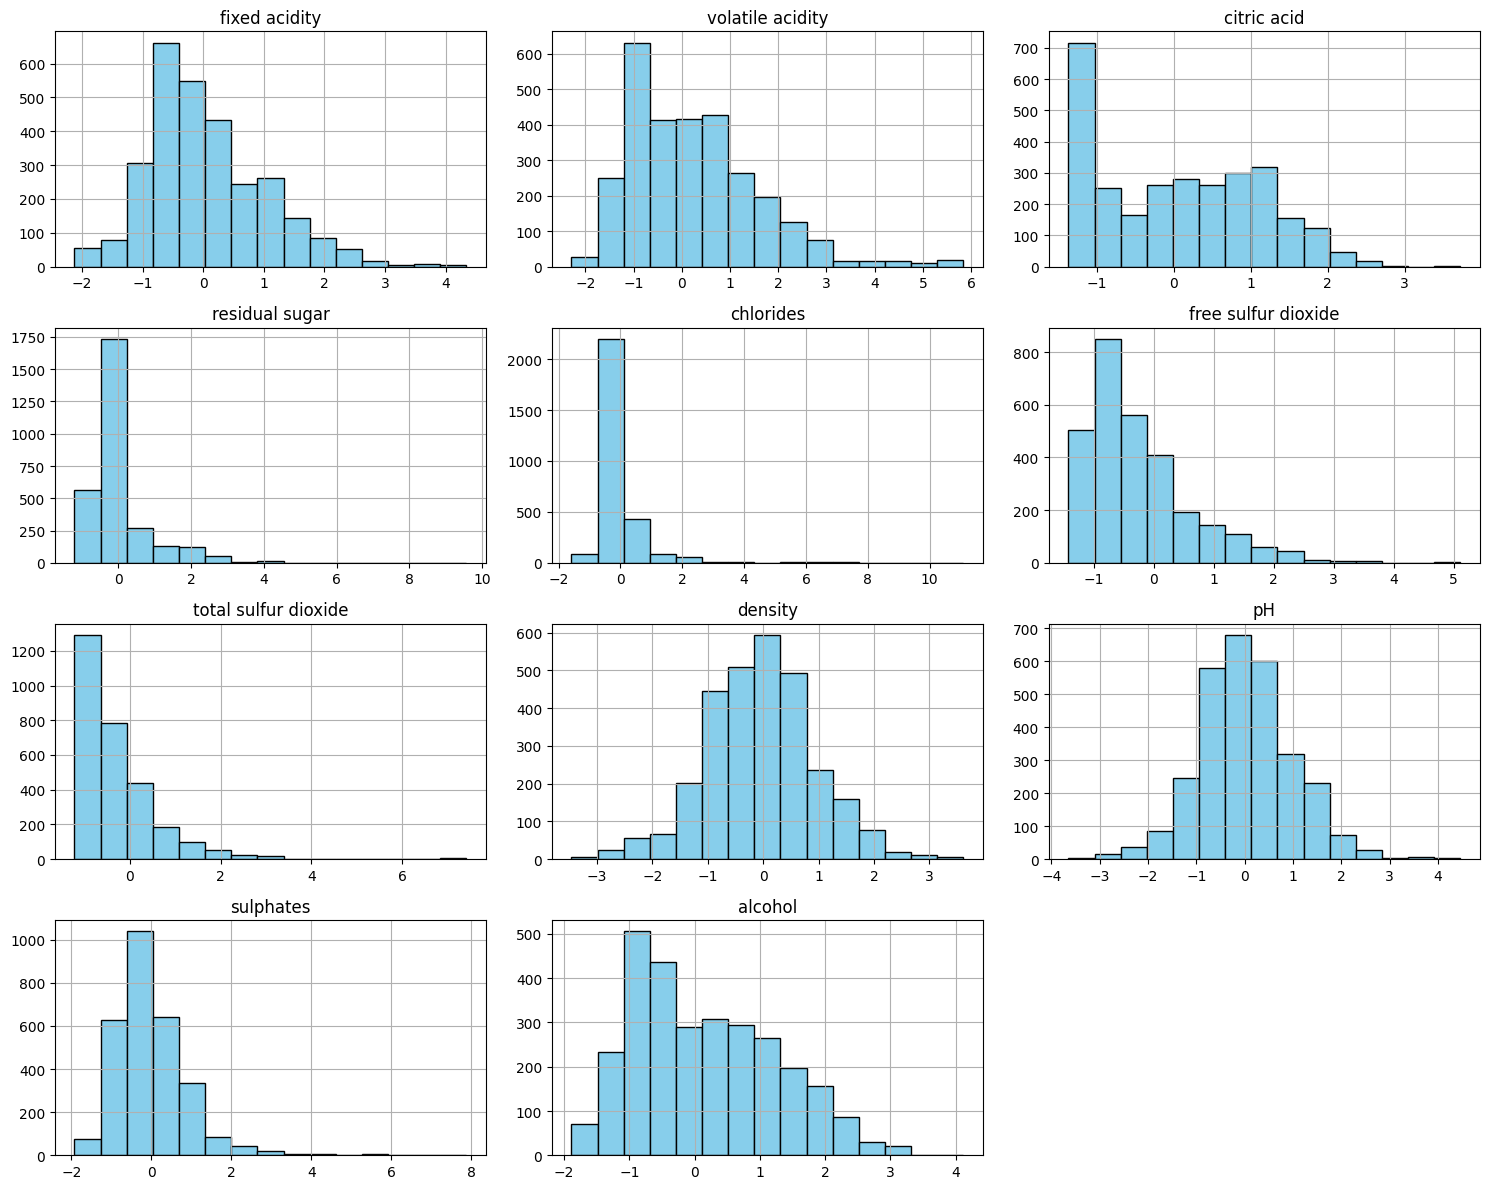

In [45]:
# Plot histograms for each feature 
X.hist(bins=15, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

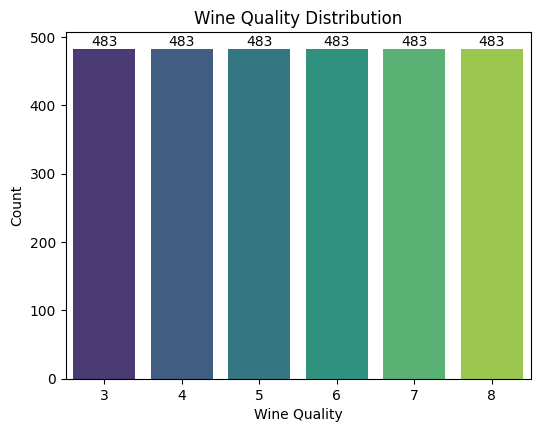

In [46]:
# Plot the distribution of wine quality
plt.figure(figsize=(6, 4.5))
ax = sns.countplot(x=Y, palette="viridis")

# Annotate each bar with the count value
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()-6), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Add title and labels
plt.title("Wine Quality Distribution")
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.show()


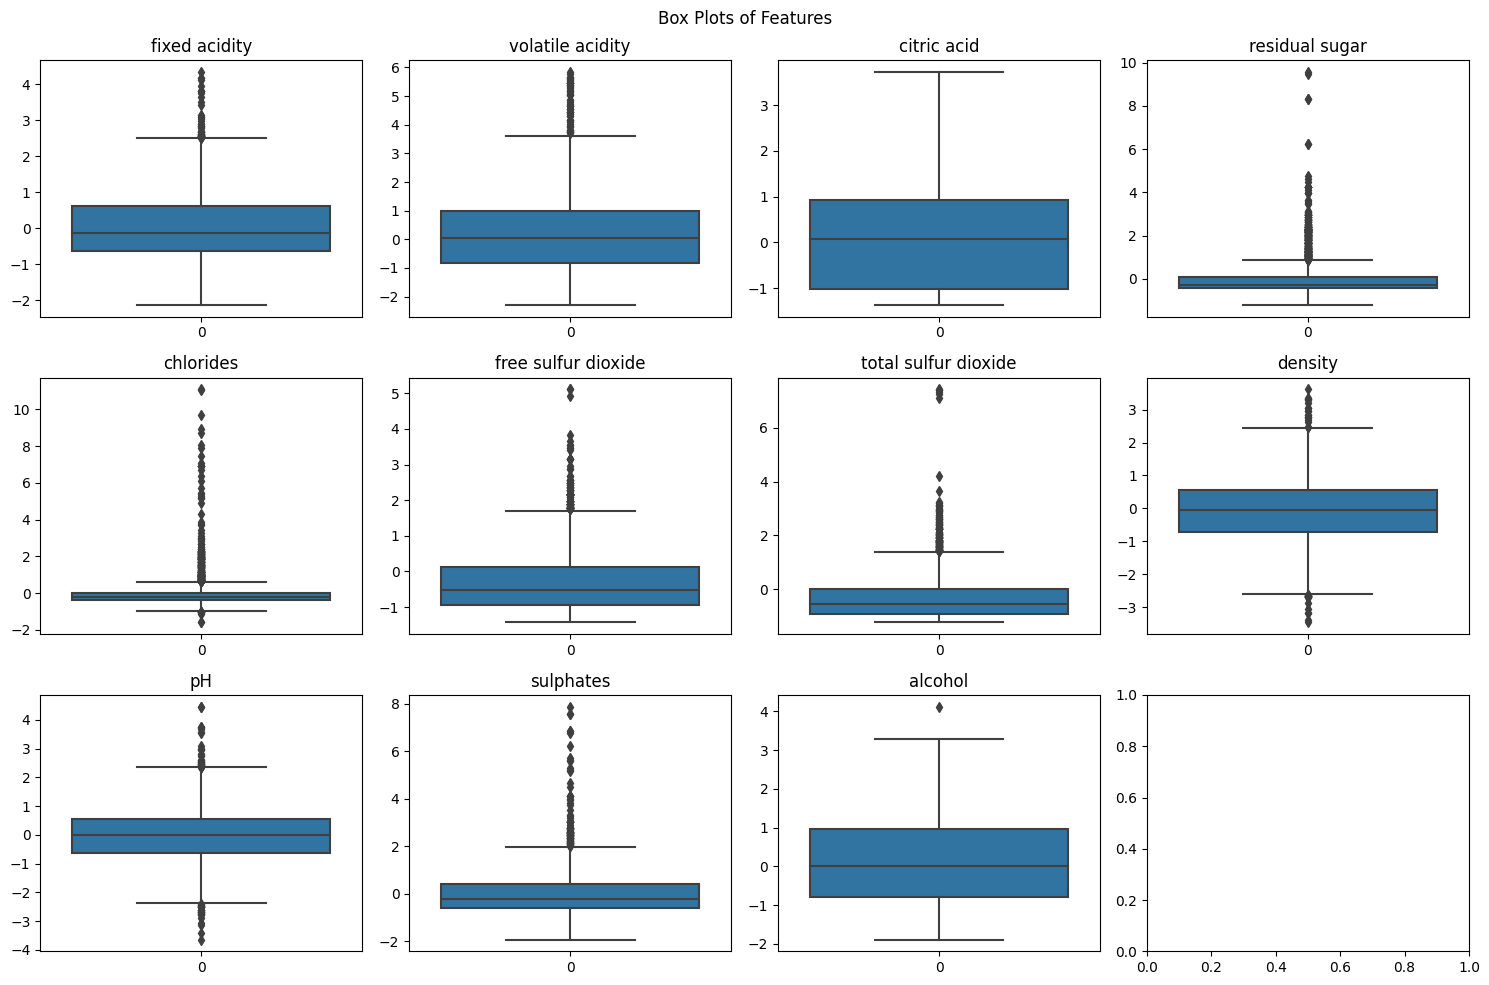

In [47]:
# Set up the grid
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle('Box Plots of Features')
axes = axes.flatten()

# Plot each feature in a box plot
for i, col in enumerate(X.columns):
    sns.boxplot(data=X[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')

# Adjust layout
plt.tight_layout()
plt.show()

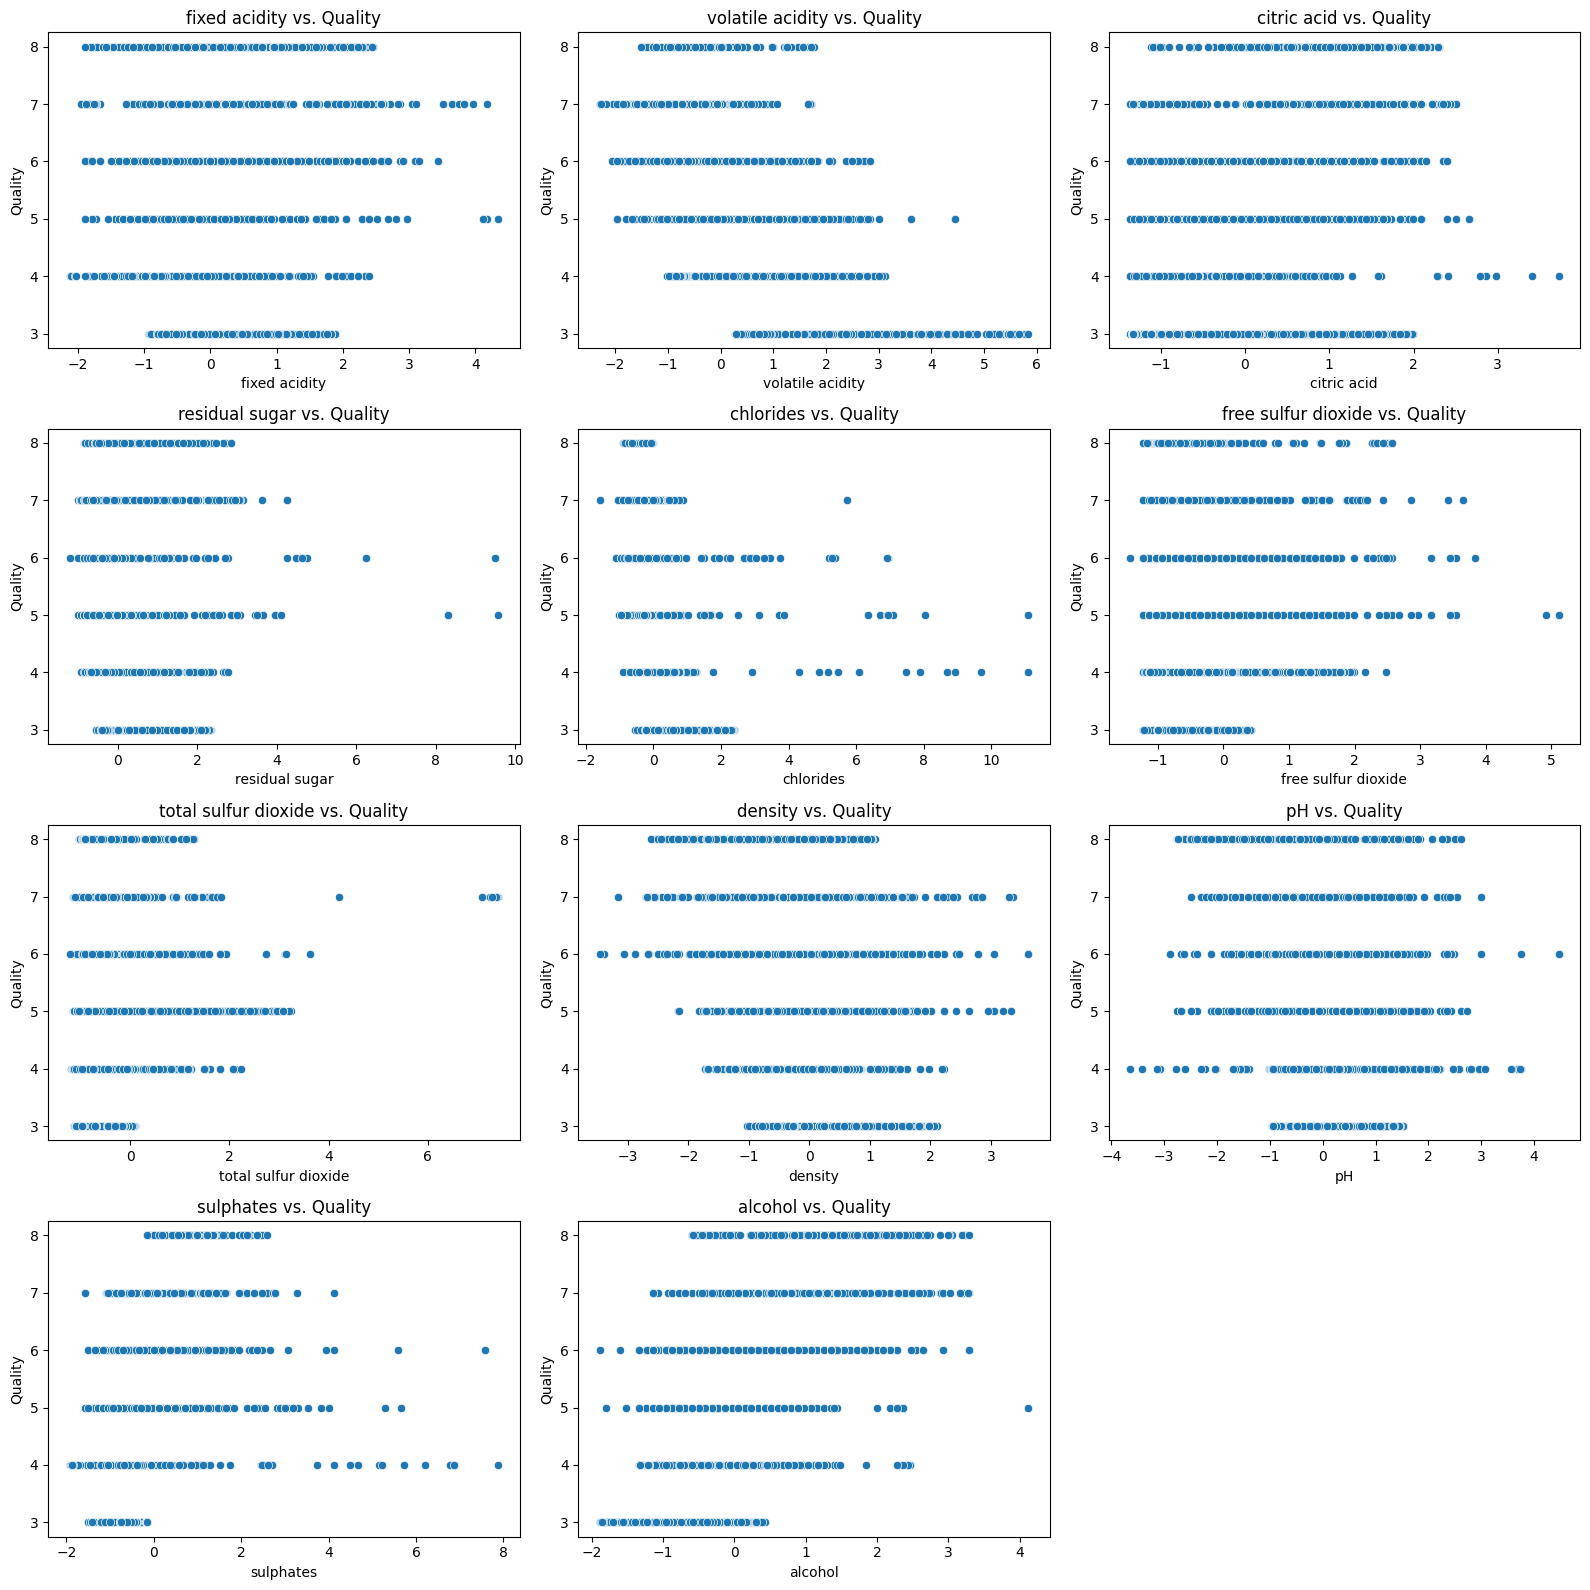

In [48]:
fig, axes = plt.subplots(4, 3, figsize=(16,16))
axes = axes.flatten()

# Plot scatterplots for each feature
for i, feature in enumerate(X):
    sns.scatterplot(x=feature, y='quality', data=dataframe, ax=axes[i])
    axes[i].set_title(f'{feature} vs. Quality')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Quality')

# Remove any empty subplots if they exist
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

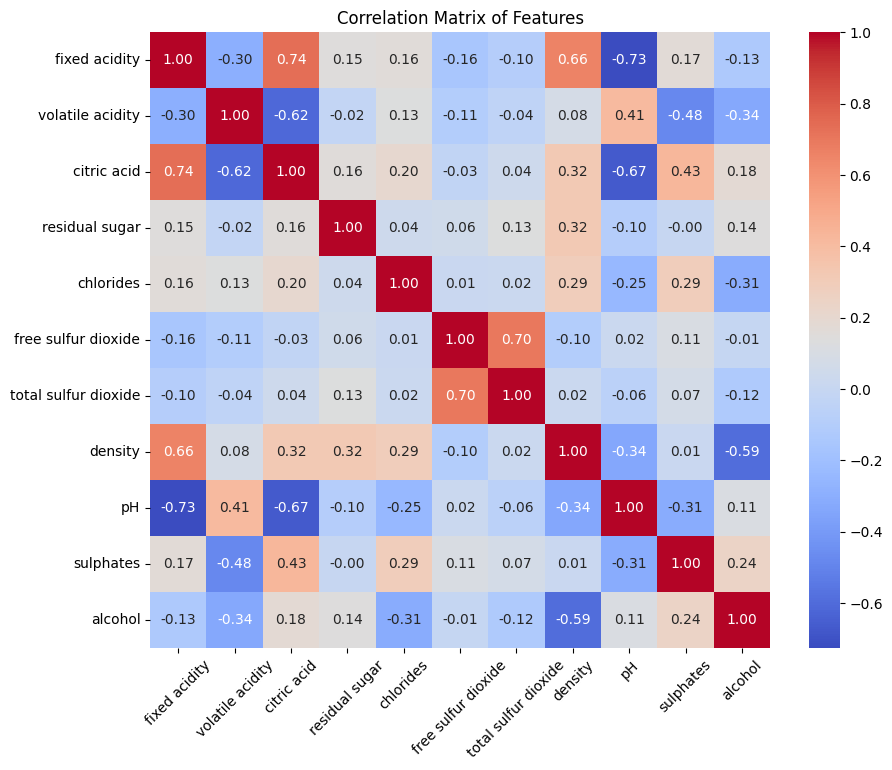

In [49]:
# Compute the correlation matrix
corr_matrix = X.corr()
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.xticks(rotation=45)
# Display the heatmap
plt.title("Correlation Matrix of Features")
plt.show()